In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [2]:
target = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\sample_submission.csv')
train = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\train.csv')
test = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\test.csv')

In [3]:
train.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB


In [5]:
train.describe()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
train.drop('id', axis = 1, inplace = True)

In [7]:
train.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

Below I want to overlay the data on top of each other and see how much they differ 

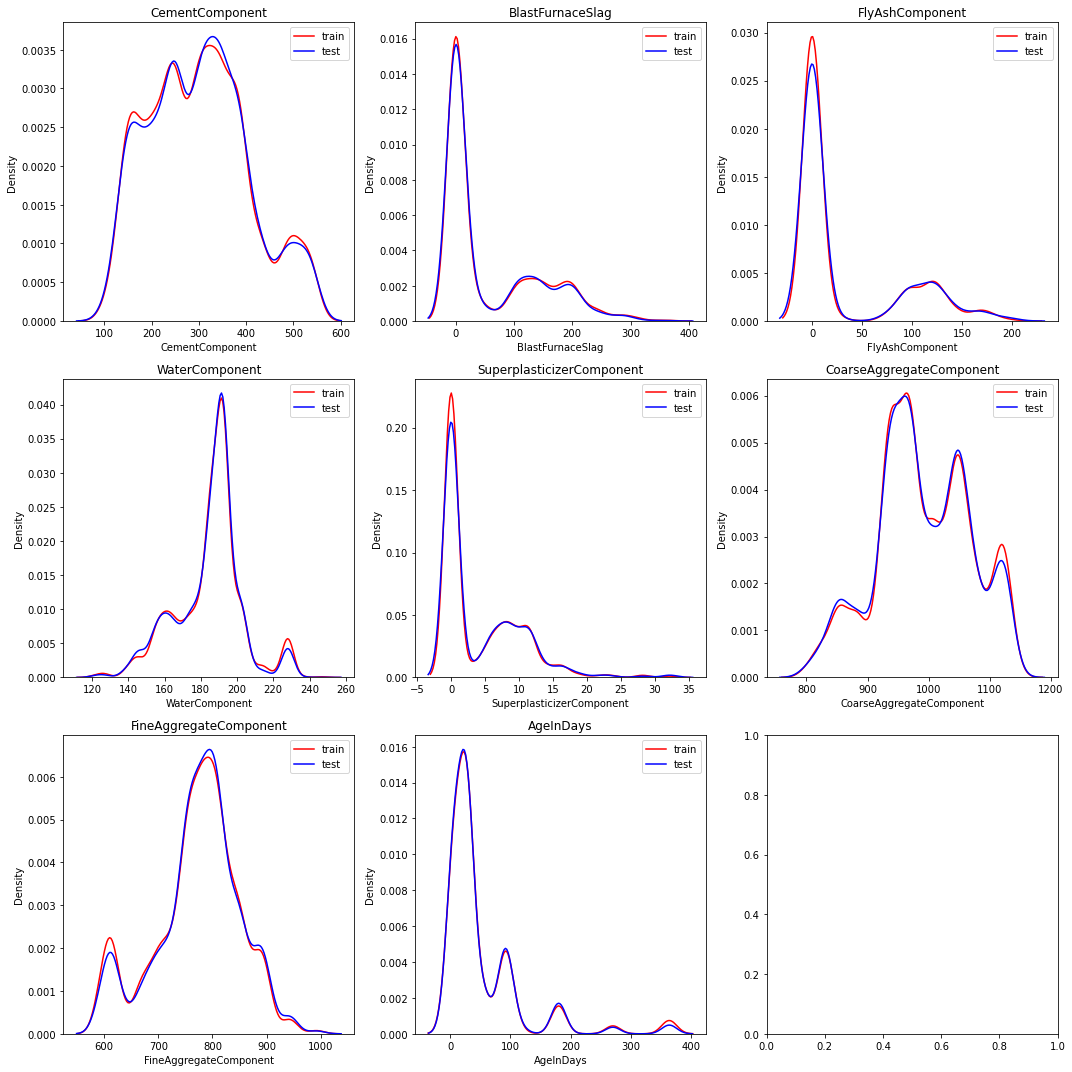

In [10]:
col = train.drop('Strength', axis = 1)
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for ax, f in zip(ax.flat, col):
    sns.kdeplot(train[f], color = 'r', label = 'train', ax = ax)
    sns.kdeplot(test[f], color = 'b', label = 'test', ax = ax)
    ax.set_title(f)
    ax.legend()
    
plt.tight_layout()
plt.show()

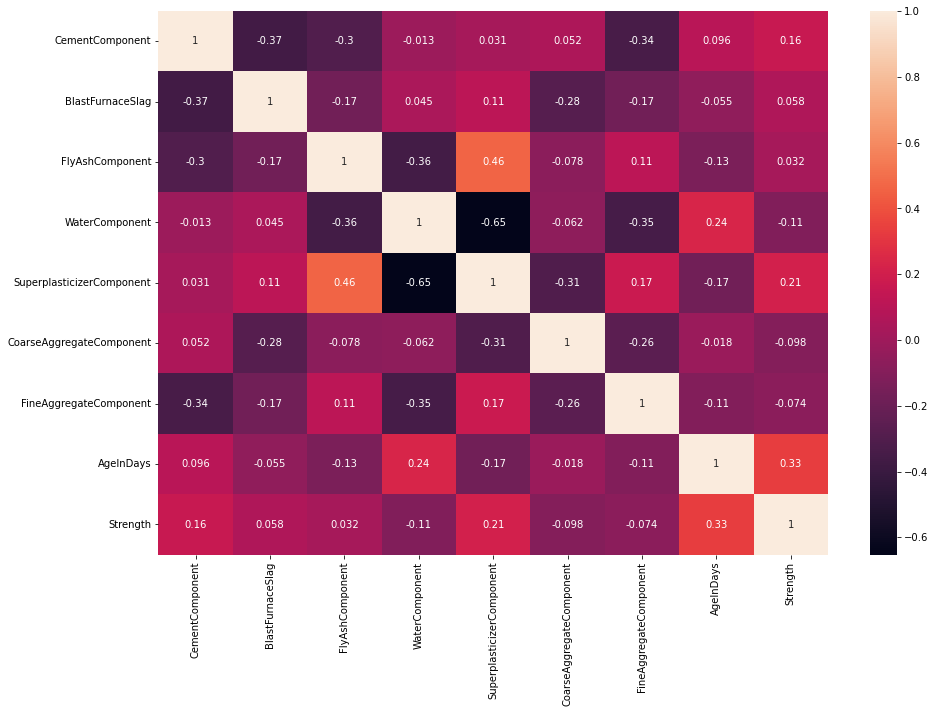

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [8]:
X = train.drop('Strength', axis = 1)
y = train.Strength

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
from sklearn.model_selection import GridSearchCV
from  xgboost import XGBRegressor

model = XGBRegressor()

parametrs = {
    'n_estimators': range(400, 600, 20),
    'max_depth': range(6, 12, 2),
    'max_bin': range(10, 15),
    'tree_method': ['hist'],
    'n_jobs': [-1]
}

grid = GridSearchCV(model, parametrs, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_bin': 14, 'max_depth': 10, 'n_estimators': 580, 'n_jobs': -1, 'tree_method': 'hist'}


In [65]:
y_pred = grid.predict(X_test)
y_pred

array([10.913989 , 27.62078  , 41.160263 , ...,  7.4035463, 39.29295  ,
       19.054777 ], dtype=float32)

In [66]:
print('SCORE')
print('MAE:', (mean_absolute_error(y_pred, y_test)).round(2))
print('MSE:', (mean_squared_error(y_pred, y_test)).round(2))
print('RMSE:', (np.sqrt(mean_squared_error(y_pred, y_test))).round(2))
print('R2_score:', (r2_score(y_pred, y_test)).round(2))

SCORE
MAE: 10.55
MSE: 182.35
RMSE: 13.5
R2_score: 0.03


In [68]:
df = pd.DataFrame(
   { 'y_pred': y_pred,
    'y_test': y_test}
)
df

,y_pred,y_test
4269,10.913989,32.40
1615,27.620781,18.20
1924,41.160263,44.52
230,25.897612,22.93
465,34.874660,21.50
...,...,...
3634,15.612544,13.71
3210,37.841705,17.60
4958,7.403546,17.96
4678,39.292950,66.82


In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred_lr = lr.predict(X_test)

In [80]:
print('SCORE')
print('MAE:', (mean_absolute_error(y_pred_lr, y_test)).round(2))
print('MSE:', (mean_squared_error(y_pred_lr, y_test)).round(2))
print('RMSE:', (np.sqrt(mean_squared_error(y_pred_lr, y_test))).round(2))
print('R2_score:', (r2_score(y_pred_lr, y_test)).round(2))

SCORE
MAE: 11.46
MSE: 207.27
RMSE: 14.4
R2_score: -2.86


In [81]:
df = pd.DataFrame(
   { 'y_pred': y_pred_lr,
    'y_test': y_test}
)
df

,y_pred,y_test
4269,26.018145,32.40
1615,29.910625,18.20
1924,40.315124,44.52
230,36.730262,22.93
465,32.920469,21.50
...,...,...
3634,27.491431,13.71
3210,33.489940,17.60
4958,29.338252,17.96
4678,40.576844,66.82
